In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv')

df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,customername,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,...,Land of Toys Inc.,NYC,NY,10022,USA,North America,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,...,Reims Collectables,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small,May


In [2]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
#df.info()

-   We'll analyze **Top Customer** by **Sales**

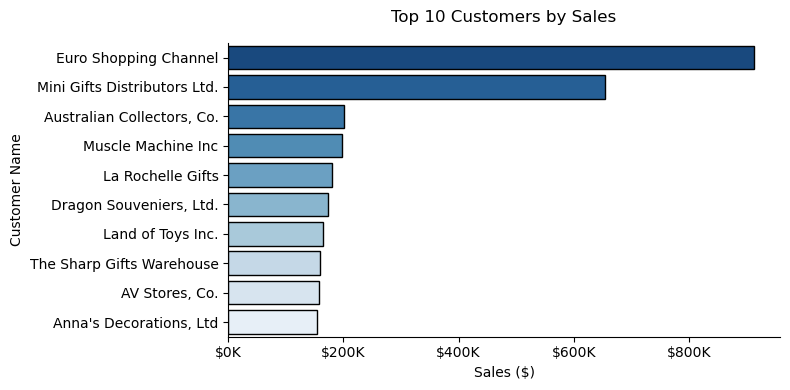

In [6]:
# top 10 customer by sales
top_customer = df.groupby('customername')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_customer,
    x='sales',
    y='customername',
    palette='Blues_r',
    edgecolor='black'
)
def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Top 10 Customers by Sales', pad=15)
plt.xlabel('Sales ($)')
plt.ylabel('Customer Name')

sns.despine()
plt.tight_layout()
plt.show()

-   This horizontal bar chart displays the top 10 customers ranked by total sales volume.

-   **Key Insights:**

-   Highest Revenue Contributors
    - **Euro Shopping Channel** leads by a wide margin, generating nearly **$900K+** in sales.
    - **Mini Gifts Distributors Ltd.** is second, contributing approximately **$700K+**.

-   Sales Drop-Off
    - There’s a significant gap between the **top 2 customers** and the remaining ones.
    - Other top customers such as **Australian Collectors, Co.**, **Muscle Machine Inc**, and **La Rochelle Gifts** cluster around the **$200K mark**.

-   Long Tail
    - The bottom 5 of the top 10 still represent key business, each bringing in **$150K–$200K**, suggesting a moderately strong mid-tier customer base.
--------

-  Let's see how frequently customers place orders by plotting the distribution of counts per customer

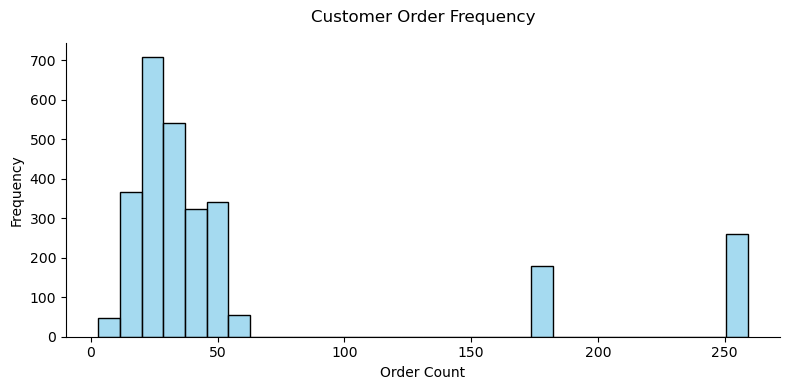

In [11]:
# Order Frequency
order_frequency = df['customername'].value_counts().reset_index()
order_frequency.columns = ['customername', 'order_count']
plt.figure(figsize=(8, 4))
sns.histplot(
    data=order_frequency,
    x='order_count',
    bins=30,
    color='skyblue',
    edgecolor='black',
    weights='order_count',

)

plt.title('Customer Order Frequency', pad=15)
plt.xlabel('Order Count')
plt.ylabel('Frequency')

sns.despine()
plt.tight_layout()
plt.show()

-   This histogram shows the distribution of customers based on how many orders they've placed.

**Key Observations:**

-   Majority of Customers
    - Most customers placed between **20 and 60 orders**, with the **peak frequency around 30 orders**.
    - These customers make up the **bulk of the customer base**, representing typical purchasing behavior.

-   Outliers
    - A small number of customers placed **extremely high numbers of orders**, with clear outliers at:
    - ~**175 orders**
    - ~**250 orders**
    - These may represent **VIP customers, resellers, or subscription accounts**.

-   Distribution Shape
    - The distribution is **right-skewed**, suggesting that while most customers place a moderate number of orders, a few place significantly more.
-----